In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
def sub_strings(big_string, substrings):
    if(type(big_string) == float): return 'U'
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    return np.nan

In [45]:
df = pd.read_csv('./test.csv')
print(df.isnull().sum())
df.head()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)
mode_emb = df['Fare'].mode()[0]
df['Fare'] = df['Fare'].fillna(mode_emb)
print(df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [47]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 3})
#df.drop(columns=['Name'], inplace=True)

In [48]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


In [49]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'U']
df['Deck']=df['Cabin'].map(lambda x: sub_strings(x, cabin_list))
df['Deck'].value_counts()

Deck
U    327
C     35
B     18
D     13
E     11
A      7
F      6
G      1
Name: count, dtype: int64

In [50]:
df['Deck'] = df['Deck'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'T': 7, 'G': 8, 'U': 0})
df['Deck'].value_counts()

Deck
0    327
3     35
2     18
4     13
5     11
1      7
6      6
8      1
Name: count, dtype: int64

In [51]:
#df.drop(columns=['Ticket'], inplace=True)
dft = df.drop(columns=['Name', 'Ticket', 'Cabin'])
dft.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,892,3,0,34.5,0,0,7.8292,3,0
1,893,3,1,47.0,1,0,7.0000,0,0
2,894,2,0,62.0,0,0,9.6875,3,0
3,895,3,0,27.0,0,0,8.6625,0,0
4,896,3,1,22.0,1,1,12.2875,0,0


In [52]:
for index, i in dft.iterrows():
    dft.loc[index, 'FamSiz'] = df['Parch'][index] + df['SibSp'][index]
dft.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamSiz
0,892,3,0,34.5,0,0,7.8292,3,0,0.0
1,893,3,1,47.0,1,0,7.0000,0,0,1.0
2,894,2,0,62.0,0,0,9.6875,3,0,0.0
3,895,3,0,27.0,0,0,8.6625,0,0,0.0
4,896,3,1,22.0,1,1,12.2875,0,0,2.0


<Axes: >

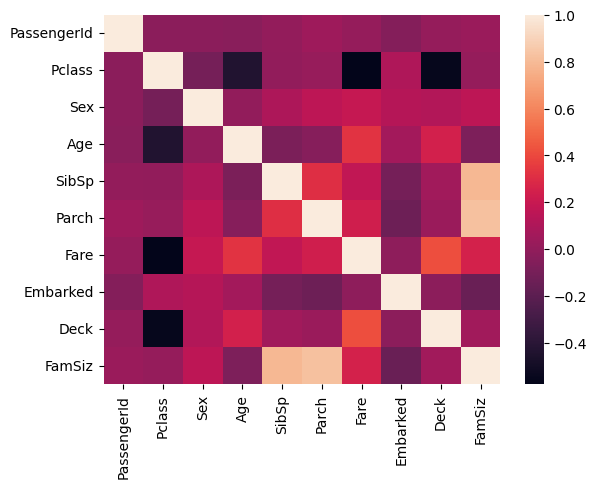

In [53]:
sns.heatmap(dft.corr())

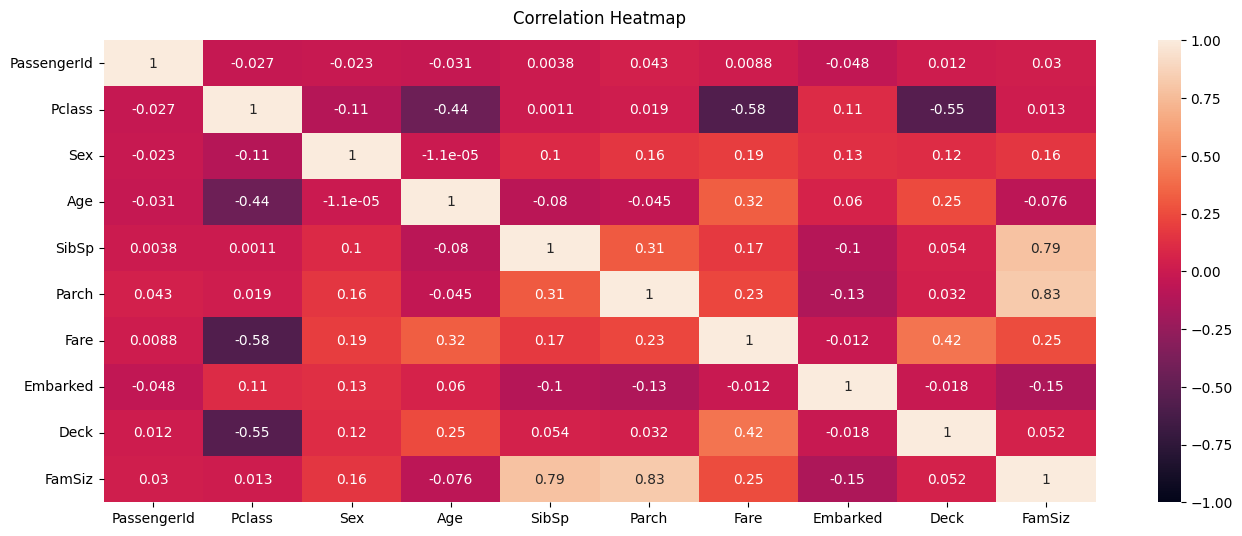

In [54]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dft.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [55]:
dft.to_csv('cleantest.csv', sep=',', index=False, encoding='utf-8')

In [63]:
from sklearn.linear_model import LogisticRegression
mdf = pd.read_csv('./cleantitanic.csv')
mdf.drop(columns=['Age', 'SibSp', 'Pclass', 'PassengerId'], inplace=True)
df = pd.read_csv('./cleantest.csv')
pdf = df.drop(columns=['Age', 'SibSp', 'Pclass', 'PassengerId'])

X_train = mdf.drop('Survived', axis=1)
y_train = mdf['Survived']
X_pred = pdf
model = LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)

y_pred = model.predict(X_pred)
df['Survived'] = y_pred
out = df.iloc[:, [0, 10]]
out

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [64]:
out.to_csv('submit.csv', sep=',', index=False, encoding='utf-8')